In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
def seno(theta):
    return np.sin(theta)

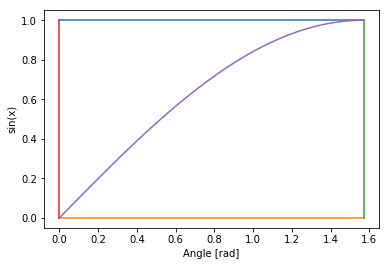

In [4]:

x = np.linspace(0, np.pi/2, 200)

plt.plot(np.linspace(0,np.pi/2,1000),(1)*np.ones(1000))
plt.plot(np.linspace(0,np.pi/2,1000),(0)*np.ones(1000))
plt.plot((np.pi/2)*np.ones(1000),np.linspace(0,1,1000))
plt.plot((0)*np.ones(1000),np.linspace(0,1,1000))



plt.plot(x, seno(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()
plt.close()

In [5]:
def puntos_x(n):
    x=np.random.rand(n)
    x=(np.pi/2)*x
    return x

In [6]:
def puntos_y(n):
    y=np.random.rand(n)
    return y
    

Monte Carlo by stone throwing 

Voy a trabajarlo sabiendo donde estan mis limites

In [7]:
def monteCarlo(n):
    
    area_cuadrado=1.6
    x=puntos_x(n)
    y=puntos_y(n)
    contador=0
    
    for i in range(n):
        if(y[i]<=seno(x[i])):
            contador+=1
        
    razon=contador/n
    
    return area_cuadrado*razon
    
    

In [9]:
resp=monteCarlo(1000000)
print(resp)
print("La diferencia es con el valor real es de: "+ str(abs(100*(resp-1)/resp))+"%")

1.0194592
La diferencia es con el valor real es de: 1.908776731820166%


Valor Medio

In [8]:
def meanValue(n):
    x=puntos_x(n)
    mean=0
    for i in range(n):
        mean+=seno(x[i])
        
    mean=mean/n
    
    return mean*(np.pi/2)
    
    
    

In [9]:
resp2=meanValue(10000)
print(resp2)
print("La diferencia es con el valor real es de: "+ str(abs(100*(resp2-1)/resp2))+"%")

0.9997431839991823
La diferencia es con el valor real es de: 0.025688197221851516%


Bono


In [52]:
def error(x):
    return abs((x-1)/x)

In [11]:
arr=[1000,10000,100000,1000000]
arr_mean=[]
arr_MC=[]

for z in range(len(arr)):
    arr_mean.append(error(meanValue(arr[z])))
    arr_MC.append(error(monteCarlo(arr[z])))
    
plt.figure()
plt.plot(arr,arr_mean,label='Mean')
plt.plot(arr,arr_MC,label='Monte Carlo')
plt.xlabel("Numero de puntos")
plt.ylabel("Error")
plt.title("Numero de puntos VS Error")
plt.legend()
plt.savefig('BonoError.pdf')
plt.close()

    










In [7]:
def coseno(x1):
	return np.cos(x1)

In [53]:
def rectangulos(n):
    x=np.linspace(0,3*np.pi/2,n)
    h=x[1]-x[0]
    resp=0
    
    for i in range(n):
        resp+=h*coseno(x[i])
    return resp
        

x=rectangulos(10001)
print(x)
print(error(abs(x)))

-0.9997643620454728
0.00023569349285974312


In [54]:
def trapezio(n):
    x=np.linspace(0,3*np.pi/2,n)
    h=x[1]-x[0]
    resp=0
    
    for i in range(n-1):
        resp+=h*(coseno(x[i])+coseno(x[i+1]))/2
    return resp
        

x=trapezio(10001)
print(x)
print(error(abs(x)))
    

-0.9999999814944893
1.850551102184359e-08


In [55]:
def simpson(n):
    
    x=np.linspace(0,3*np.pi/2,n)
    h=x[1]-x[0]
    arr_f=coseno(x)
    arr_final=0
    
    for i in range(n):
        if(i==0):
            arr_final+=arr_f[i]*h/3
            
        elif(i==n-1):
            arr_final+=arr_f[i]*h/3
            
        elif(i%2==0):
            arr_final+=arr_f[i]*2*h/3
            
        else:
            arr_final+=arr_f[i]*4*h/3
    return arr_final
    
x=simpson(10000001)
print(x)


            
    

-1.0000000000000153


In [67]:
def error2(x):
    return abs(((1-abs(x))/abs(x)))

[ -3.71626527  -6.04756155  -8.35297836 -10.65584624 -12.9584596
 -15.2610472 ]
[ -8.59463494 -13.200025   -17.80519726 -22.41036819 -27.00356767
 -33.64575812]
[-17.41259325 -26.62378169 -35.63818828 -33.96421185 -32.40606723
 -31.80954688]


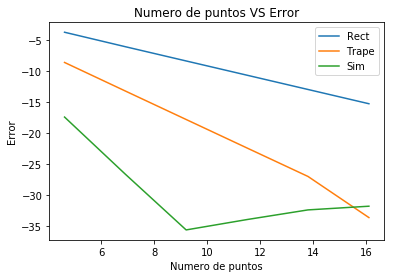

In [69]:
arr=[101,1001,10001,100001,1000001,10000001]
arr_rect=[]
arr_trape=[]
arr_sim=[]

for z in range(len(arr)):
    arr_rect.append((error2(rectangulos(arr[z]))))
    arr_trape.append((error2(trapezio(arr[z]))))
    arr_sim.append((error2(simpson(arr[z]))))

arr=np.log(arr)
arr_rect=np.log(arr_rect)
arr_trape=np.log(arr_trape)
arr_sim=np.log(arr_sim)
                   
print(arr_rect)
print(arr_trape)
print(arr_sim)

plt.figure()
plt.plot(arr,arr_rect,label='Rect')
plt.plot(arr,arr_trape,label='Trape')
plt.plot(arr,arr_sim,label='Sim')
plt.xlabel("Numero de puntos")
plt.ylabel("Error")
plt.title("Numero de puntos VS Error")
plt.legend()
plt.savefig("ErrorRTS.pdf")
plt.show()
plt.close()

    

In [35]:
def puntos_x_neg(n):
    x=np.random.rand(n)
    x=(np.pi)*x
    return x
def puntos_y_neg(n):
    x=np.random.rand(n)
    x=2*x-1
    return x
    
    

In [38]:
## Metodos de casa Negativos 
## El de valor medio no se afecta
def NegMeanValue(n):
    x=puntos_x(n)
    mean=0
    for i in range(n):
        mean+=coseno(x[i])
        
    mean=mean/n
    
    return mean*(np.pi/2)
    
print(NegMeanValue(10000))

## Para montecarlo si debemos tener en cuenta que puede haber negativos 
#El enunciado dice que debe hacerse para coseno entre 0 y pi/2 pero esto es siempre positivo asi que lo modificare para probar 
def NegMonteCarlo(n):
    
    area_cuadrado=np.pi
    x=puntos_x_neg(n)
    y=puntos_y_neg(n)
    contador_pos=0
    contador_neg=0
    Total=0
    
    for i in range(n):
        if(y[i]<=0 and y[i]>=coseno(x[i])):
            contador_neg+=1
            
        elif(y[i]>=0 and y[i]<=coseno(x[i])):
            contador_pos+=1
            
        Total+=1
        
  
    razon=(contador_pos+contador_neg)/Total
    Area_enValorABS=razon*area_cuadrado
    
    Area_Real=Area_enValorABS*(contador_pos/(contador_neg+contador_pos))-Area_enValorABS*(contador_neg/(contador_neg+contador_pos))
        
    return Area_Real
    
print(NegMonteCarlo(10000))








0.9958695282590837
0.00439822971502557


In [13]:
def puntos(n):
    x=np.random.rand(n)
    x=(np.pi*1.5)*x
    return x

In [22]:
def f(x1,x2,x3,x4):
    return np.cos(x1+x2)*x3*x4

In [27]:
def meanValue2(n):
    x1=puntos(n)
    x2=puntos(n)
    x3=puntos(n)
    x4=puntos(n)
    mean=0
    for i in range(n):
        mean+=f(x1[i],x2[i],x3[i],x4[i])
        
    mean=mean/n
    
    return mean*(1.5*np.pi)**4
    

In [45]:
def promedio(n):
    promedio=0
    for i in range(n):
        promedio+=(meanValue2(10000))
    return promedio/n

In [44]:
print(promedio(10))
#Luego de probar muchas veces escogi el numero de puntos e intentos empiricamente al ver los resultados que obtenia 

-0.00901160155128542


In [47]:
def f2(x):
    return 1/(x**2)

In [70]:
def meanValue3(n):
    x=np.random.rand(n)
    mean=0
    for i in range(n):
        mean+=(f2(x[i]))
               
    mean=(mean/n)
    
    return mean
    
    

In [74]:
print(meanValue3(100000))
#El numero de puntos lo escogi empiricamente luego de muchos intentos 

40152.44596923163


Como los puntos se escogen al azar, es poco probable que tome el cero y por ello puedo integrar sin problemas. Sin embargo, cabe recalcar que la integral va a dar valores muy diferentes cada vez que se ejecute devido a que el valor "real" de la integral es infinito. Seria apropiado escoger un epsilon que me determine que tan cerca de cero quiero ir, para asi tener una idea de que tan lejos estoy del valor real.

In [41]:
datos = np.genfromtxt("datos.txt")

In [42]:
datos_x=datos[:,0]
datos_y=datos[:,1]

In [39]:
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

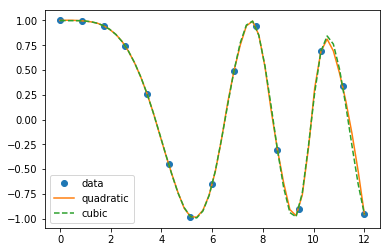

In [49]:
x = np.linspace(0, 12, num=15, endpoint=True)
y = datos_y
>>> f = interp1d(x, y, kind='quadratic')
>>> f2 = interp1d(x, y, kind='cubic')

>>> xnew = np.linspace(0, 12, num=50, endpoint=True)

>>> plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
>>> plt.legend(['data', 'quadratic', 'cubic'], loc='best')
>>> plt.show()
plt.close()

